# ASSOCIATION RULES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\10 Association Rules\Online retail.csv',header=None)

## Data cleaning

In [3]:
## splitting each value separated by comma into an item
data['Items']=data.iloc[:,0].apply(lambda x:x.split(',') if isinstance(x,str) else None)

In [4]:
data.head()

,0,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr...","[shrimp, almonds, avocado, vegetables mix, gre..."
1,"burgers,meatballs,eggs","[burgers, meatballs, eggs]"
2,chutney,[chutney]
3,"turkey,avocado","[turkey, avocado]"
4,"mineral water,milk,energy bar,whole wheat rice...","[mineral water, milk, energy bar, whole wheat ..."


In [5]:
## items into individual binary columns
data_item_df=data.copy()

In [6]:
for index,row in data_item_df.iterrows():
    for item in row['Items']:
        data_item_df.at[index,item]=1

In [7]:
data_item_df=data_item_df.fillna(0)

In [8]:
data_item_df

,0,Items,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,"shrimp,almonds,avocado,vegetables mix,green gr...","[shrimp, almonds, avocado, vegetables mix, gre...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"burgers,meatballs,eggs","[burgers, meatballs, eggs]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chutney,[chutney],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"turkey,avocado","[turkey, avocado]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"mineral water,milk,energy bar,whole wheat rice...","[mineral water, milk, energy bar, whole wheat ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,"butter,light mayo,fresh bread","[butter, light mayo, fresh bread]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,"burgers,frozen vegetables,eggs,french fries,ma...","[burgers, frozen vegetables, eggs, french frie...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,chicken,[chicken],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7499,"escalope,green tea","[escalope, green tea]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
## strip leading/trailing spaces from the column names
data_item_df.columns=data_item_df.columns.str.strip()

In [10]:
## handle duplicate columns by summing their values(since 1 represents presence of the genre)
data_item_df=data_item_df.groupby(axis=1,level=0).sum()

In [11]:
data_item_df.drop('Items',axis=1,inplace=True)
data_item_df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Apriori algorithm

In [12]:
! pip install mlxtend

In [13]:
import mlxtend

In [14]:
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
frequent_itemsets=apriori(data_item_df,min_support=0.01,use_colnames=True)

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(milk, spaghetti, mineral water)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


In [17]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)

In [18]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
...,...,...,...,...,...,...,...,...,...,...
427,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
428,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
429,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862
430,(spaghetti),"(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385,0.590626


In [19]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
238,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
239,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094
410,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
411,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
423,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314
422,"(spaghetti, mineral water)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007
214,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930,0.639616
215,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381,0.658656
210,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825,0.636767
211,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268,0.653563


In [20]:
## rules with lift value greater than 1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
...,...,...,...,...,...,...,...,...,...,...
427,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
428,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
429,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862
430,(spaghetti),"(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385,0.590626


In [21]:
rules1=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.1)

In [22]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630,0.178411
...,...,...,...,...,...,...,...,...,...,...
315,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314
316,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
317,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
318,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902


In [23]:
rules.sort_values('confidence',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
366,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
402,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
342,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
390,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555
296,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
426,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
420,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514
414,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879,0.479672
348,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,0.467922
408,"(ground beef, spaghetti)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914,0.470957


In [24]:
## given confidence threshold of 0.1, we see that customer will purchase mineral water if they purchase combinations like (eggs, ground beef), (milk, ground beef) etc.

### Interview Questions

In [25]:
# 1. What is lift and why is it important in Association rules?
# Lift is a measure of the strength of the association between two items, taking into account the frequency of both items in the dataset.
# It is calculated as the confidence of the association divided by the support of the second item.
# A lift value greater than 1 indicates that the association between two items is stronger than expected based on the frequency of the individual items.
# A lift value less than 1 indicates that the association is weaker than expected and may be less reliable or less significant.

In [26]:
# 2. What is support and Confidence. How do you calculate them?
# Support is a measure of the number of times an item set appears in a dataset. Support is calculated by dividing the number of transactions
# containing an item set by the total number of transactions.
# Confidence is a measure of the likelihood that an itemset will appear if another itemset appears. Confidence is calculated by dividing the
# number of transactions containing both itemsets by the number of transactions containing the first itemset.

In [27]:
# 3. What are some limitations or challenges of Association rules mining?
# Some of the limitations of association rules are
# 1. Association rule mining can generate a large number of rules. Here, all the rules may not be meaningful or useful. Some of these rules may be
# coincidental and may not represent actual patterns or relationships in the data.
# 2. Limited Scope: Association rule mining is primarily designed to identify binary relationships between variables, and may not be able to detect
# more complex patterns or relationships. It may also miss important relationships that are not captured by the data.
# 3. Computationally Intensive: Algorithms in association rule mining can be computationally intensive, particularly when dealing with large datasets.
# This can lead to long processing times and require significant computing resources.

### Visualization

In [30]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
...,...,...,...,...,...,...,...,...,...,...
427,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
428,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
429,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862
430,(spaghetti),"(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385,0.590626


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


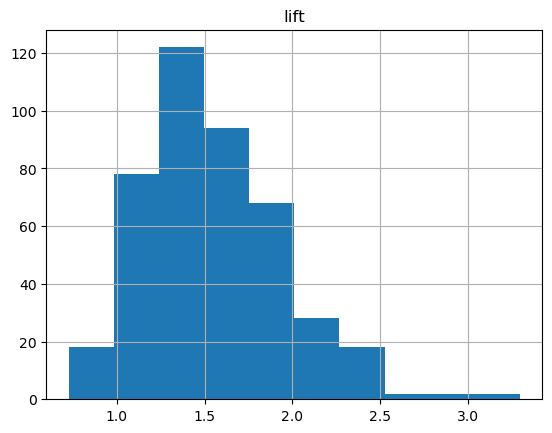

In [33]:
rules.hist('lift')
plt.show();

<Axes: xlabel='support', ylabel='Count'>

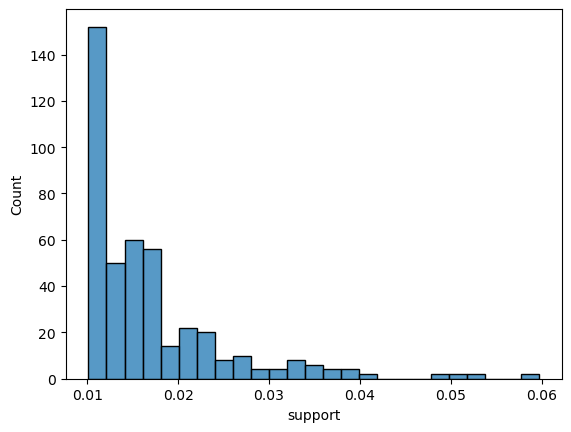

In [34]:
sns.histplot(data=rules,x='support')

<Axes: xlabel='confidence', ylabel='Density'>

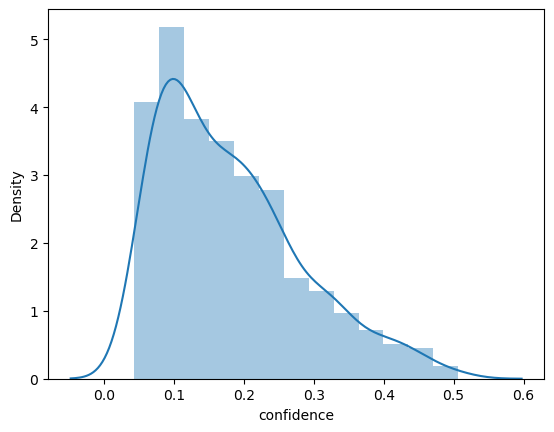

In [35]:
sns.distplot(rules['confidence'])

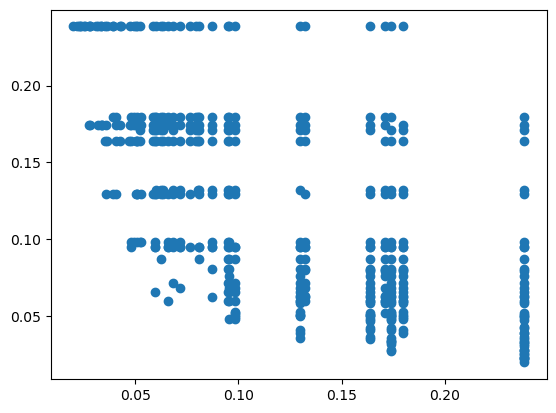

In [36]:
plt.scatter(rules['antecedent support'],rules['consequent support'])

<Axes: xlabel='antecedents', ylabel='count'>

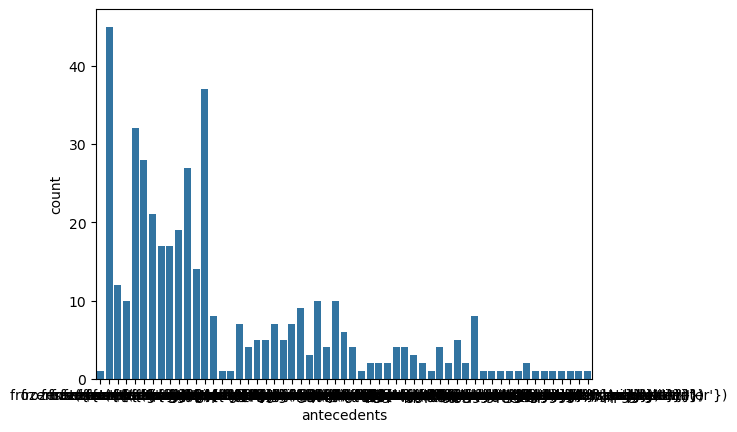

In [40]:
sns.countplot(data=rules,x='antecedents')

<Axes: xlabel='consequents', ylabel='count'>

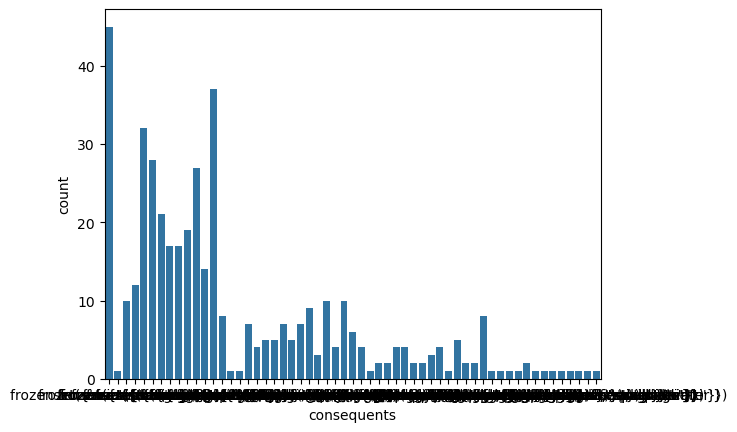

In [41]:
sns.countplot(data=rules,x='consequents')